Objective: To Analyze supply chain data to identify inefficiencies, optimize operations, reduce costs and improve delivery times.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
sd = pd.read_csv('/content/supply_chain_data.csv')

In [ ]:
sd.head(10)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
5,haircare,SKU5,1.699976,87,147,2828.348746,Non-binary,90,27,66,...,Bangalore,10,104,17,56.766476,Fail,2.779194,Road,Route A,235.461237
6,skincare,SKU6,4.078333,48,65,7823.476560,Male,11,15,58,...,Kolkata,14,314,24,1.085069,Pending,1.000911,Sea,Route A,134.369097
7,cosmetics,SKU7,42.958384,59,426,8496.103813,Female,93,17,11,...,Bangalore,22,564,1,99.466109,Fail,0.398177,Road,Route C,802.056312
8,cosmetics,SKU8,68.717597,78,150,7517.363211,Female,5,10,15,...,Mumbai,13,769,8,11.423027,Pending,2.709863,Sea,Route B,505.557134
9,skincare,SKU9,64.015733,35,980,4971.145988,Unknown,14,27,83,...,Chennai,29,963,23,47.957602,Pending,3.844614,Rail,Route B,995.929461


1. SKU - Stock Keeping Unit
2. Cusotmer Demographics - Info about Customers such as gender, age, geographical location.
3. Lead times - The time required to order or recieve products from suppliers.

In [ ]:
ptype = sd['Product type'].nunique()
custype = sd['Customer demographics'].nunique()
loc = sd['Location'].nunique()
inspectype = sd['Inspection results'].nunique()
transtype = sd['Transportation modes'].nunique()
sup = sd['Supplier name'].nunique()
print(f"Product Types: {ptype}")
print(f"Customer Types: {custype}")
print(f"Location: {loc}")
print(f"Inspection Results: {inspectype}")
print(f"Transportation Modes: {transtype}")
print(f"Supplier Name: {sup}")

Product Types: 3
Customer Types: 4
Location: 5
Inspection Results: 3
Transportation Modes: 4
Supplier Name: 5


**Customer Demographics vs Revenue Generated**

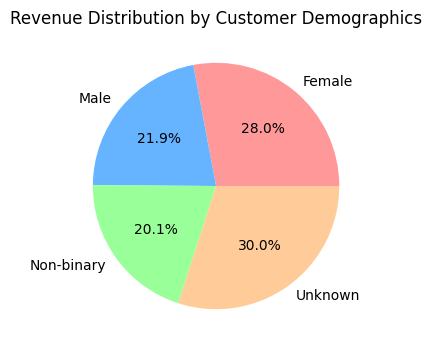

In [ ]:
total_rev = sd['Revenue generated'].sum()
cus_rev = sd.groupby('Customer demographics')['Revenue generated'].sum()
perc_rev = (cus_rev/total_rev)*100

plt.figure(figsize=(4, 4))
perc_rev.plot.pie(
    autopct='%1.1f%%',
    colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
)
plt.title('Revenue Distribution by Customer Demographics')
plt.ylabel('')
plt.show()

In [ ]:
# print(sd.loc[(sd['Product type']=='skincare'),'Revenue generated'].max())

In [ ]:
# sd.loc[sd['Product type']=='skincare'].sort_values(by='Revenue generated',ascending=False).head(10)

**Product Type vs Price**

<Axes: xlabel='Product type', ylabel='Price'>

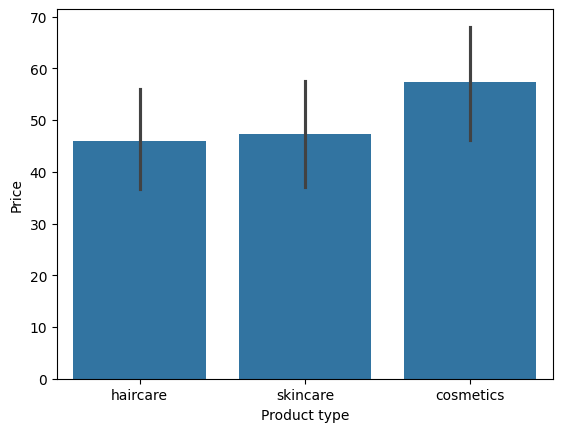

In [ ]:
sns.barplot(x=sd['Product type'],y=sd['Price'])

In [ ]:
"""
   SELECT Product type, AVG(Revenue generated) FROM Supply Chain
   GROUP BY Product type;

print(sd.loc[:,['Product type','Revenue generated']].groupby('Product type').sum(),
      "\n\n",sd.loc[:,['Product type','Revenue generated']].groupby('Product type').mean())
      """

'\n   SELECT Product type, AVG(Revenue generated) FROM Supply Chain\n   GROUP BY Product type;\n\nprint(sd.loc[:,[\'Product type\',\'Revenue generated\']].groupby(\'Product type\').sum(),\n      "\n\n",sd.loc[:,[\'Product type\',\'Revenue generated\']].groupby(\'Product type\').mean())\n      '

**Revenue by Product Type Average & Sum**

In [ ]:
nskin = len(sd.loc[sd['Product type']=='skincare'].value_counts())
nhair = len(sd.loc[sd['Product type']=='haircare'].value_counts())
ncos = len(sd.loc[sd['Product type']=='cosmetics'].value_counts())
print(f"Skincare: {nskin}\nHaircare: {nhair}\nCosmetics: {ncos}")

Skincare: 40
Haircare: 34
Cosmetics: 26


In [ ]:
Products = pd.DataFrame(columns=['ProdType','Average','Sum'])
Products['ProdType'] = ['Skincare','Haircare','Cosmetics']

if Products.loc[Products['ProdType']=='Skincare'].empty == False:
  Products.loc[Products['ProdType']=='Skincare','Average'] = round(sd.loc[sd['Product type']=='skincare','Revenue generated'].mean(),2)
  Products.loc[Products['ProdType']=='Skincare','Sum'] = round(sd.loc[sd['Product type']=='skincare','Revenue generated'].sum(),2)

if Products.loc[Products['ProdType']=='Haircare'].empty == False:
  Products.loc[Products['ProdType']=='Haircare','Average'] = round(sd.loc[sd['Product type']=='haircare','Revenue generated'].mean(),2)
  Products.loc[Products['ProdType']=='Haircare','Sum'] = round(sd.loc[sd['Product type']=='haircare','Revenue generated'].sum(),2)

if Products.loc[Products['ProdType']=='Cosmetics'].empty == False:
  Products.loc[Products['ProdType']=='Cosmetics','Average'] = round(sd.loc[sd['Product type']=='cosmetics','Revenue generated'].mean(),2)
  Products.loc[Products['ProdType']=='Cosmetics','Sum'] = round(sd.loc[sd['Product type']=='cosmetics','Revenue generated'].sum(),2)

Products

,ProdType,Average,Sum
0,Skincare,6040.7,241628.16
1,Haircare,5131.04,174455.39
2,Cosmetics,6212.36,161521.27


**Location wise Revenue Generated against Product type and Defect Rates**

<Axes: xlabel='Location', ylabel='count'>

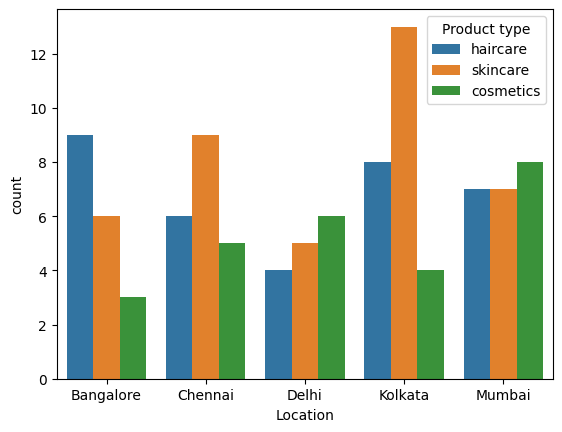

In [ ]:
location_prod_count = sd.groupby('Location')['Product type'].value_counts().reset_index(name='count')
sns.barplot(x='Location',y='count',hue='Product type',data=location_prod_count)

<Axes: xlabel='Location', ylabel='Revenue'>

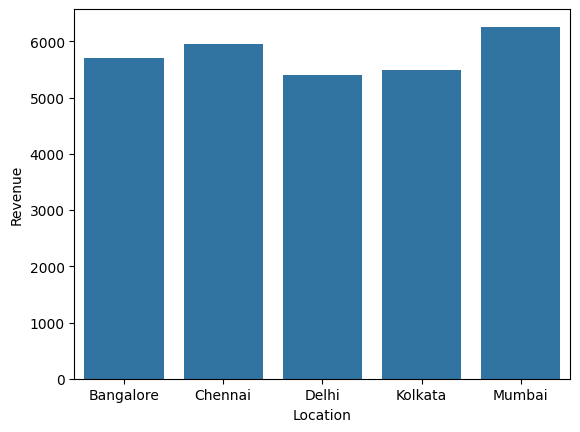

In [ ]:
location_revenue = sd.groupby('Location')['Revenue generated'].mean().reset_index(name='Revenue')
sns.barplot(x='Location',y='Revenue',data=location_revenue)

In [ ]:
locpc = dict({})
loc = ['Mumbai','Delhi','Bangalore','Chennai','Kolkata']
prod = ['skincare','haircare','cosmetics']
for l in loc:
  for p in prod:
    locpc[l,p] = len(sd.loc[(sd['Location']==l) & (sd['Product type']==p)])
print(locpc)

{('Mumbai', 'skincare'): 7, ('Mumbai', 'haircare'): 7, ('Mumbai', 'cosmetics'): 8, ('Delhi', 'skincare'): 5, ('Delhi', 'haircare'): 4, ('Delhi', 'cosmetics'): 6, ('Bangalore', 'skincare'): 6, ('Bangalore', 'haircare'): 9, ('Bangalore', 'cosmetics'): 3, ('Chennai', 'skincare'): 9, ('Chennai', 'haircare'): 6, ('Chennai', 'cosmetics'): 5, ('Kolkata', 'skincare'): 13, ('Kolkata', 'haircare'): 8, ('Kolkata', 'cosmetics'): 4}


In [ ]:
locpc_d = dict({})
for l in loc:
  for p in prod:
      locpc_d[l,p] = len(sd.loc[(sd['Location']==l) & (sd['Product type']==p) & (sd['Defect rates']>np.mean(sd['Defect rates']))])
print(locpc_d)

{('Mumbai', 'skincare'): 3, ('Mumbai', 'haircare'): 3, ('Mumbai', 'cosmetics'): 3, ('Delhi', 'skincare'): 2, ('Delhi', 'haircare'): 3, ('Delhi', 'cosmetics'): 3, ('Bangalore', 'skincare'): 2, ('Bangalore', 'haircare'): 2, ('Bangalore', 'cosmetics'): 1, ('Chennai', 'skincare'): 6, ('Chennai', 'haircare'): 5, ('Chennai', 'cosmetics'): 2, ('Kolkata', 'skincare'): 5, ('Kolkata', 'haircare'): 5, ('Kolkata', 'cosmetics'): 1}


In [ ]:
perdefect = dict({})
for l in loc:
  for p in prod:
    perdefect[l,p] = round(locpc_d[l,p]/locpc[l,p]*100,2)
data = [{'Location': k[0], 'Product type': k[1], 'Defect Percentage': v} for k, v in perdefect.items()]
DefectRate = pd.DataFrame(data)
#DefectRate.to_csv('DefectRate.csv',index=False)

**Most Reliable Supplier**

In [ ]:
leadSup = sd.groupby('Supplier name')[['Lead time','Defect rates']].mean()
leadSup

,Lead time,Defect rates
Supplier name,,
Supplier 1,14.777778,1.803630
Supplier 2,18.545455,2.362750
Supplier 3,20.133333,2.465786
Supplier 4,15.222222,2.337397
Supplier 5,18.055556,2.665408


In [ ]:
locSup = sd.groupby('Location')['Supplier name'].value_counts().reset_index(name='Count')
locSup

,Location,Supplier name,Count
0,Bangalore,Supplier 1,5
1,Bangalore,Supplier 2,5
2,Bangalore,Supplier 3,3
3,Bangalore,Supplier 5,3
4,Bangalore,Supplier 4,2
5,Chennai,Supplier 5,5
6,Chennai,Supplier 1,4
7,Chennai,Supplier 3,4
8,Chennai,Supplier 4,4
9,Chennai,Supplier 2,3


In [ ]:
sd.loc[sd['Defect rates']>=np.mean(sd['Defect rates']),'Production volumes'].mean()

595.1739130434783

<Axes: >

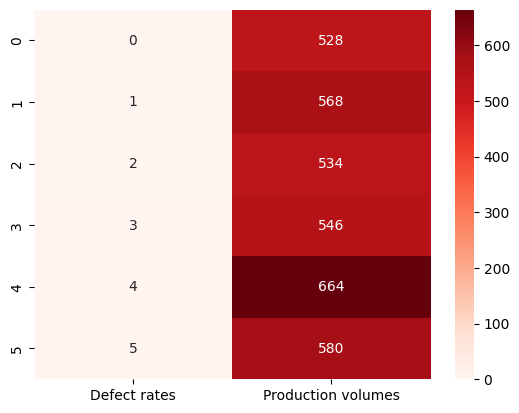

In [ ]:
sd['Defect rates'] = sd['Defect rates'].apply(lambda x: round(x,0))
def_prodVol = sd.groupby('Defect rates')['Production volumes'].mean().reset_index(name='Production volumes')
sns.heatmap(data=def_prodVol,annot=True,fmt='.0f',cmap='Reds')

1. Profit = Revenue generated - Price*Production volumes
2. Defect Rates less than mean
3. Region wise Revenues
4. Gross of Haircare Products in Bangalore

In [ ]:
"""
  1
  SELECT (Revenue generated - Price*Production Volumes) AS Profit
  FROM SUPPLY CHAIN;

  2
  SELECT * FROM Supply Chain WHERE Defect rates < MEAN(Defect rates);

  3
  SELECT Revenue generated FROM Supply Chain
  GROUP BY Location;

  4
  SELECT Revenue Generated FROM Supply Chain
  WHERE Product type = 'Haircare' AND Location = 'Bangalore';

  5
  SELECT Revenue Generated FROM Supply Chain
  WHERE Revenue Generated = max(Revenue Gnenerated) AND Defect Rates > avg(Revenue Generated);

"""

"\n  1\n  SELECT (Revenue generated - Price*Production Volumes) AS Profit\n  FROM SUPPLY CHAIN;\n\n  2\n  SELECT * FROM Supply Chain WHERE Defect rates < MEAN(Defect rates);\n\n  3\n  SELECT Revenue generated FROM Supply Chain\n  GROUP BY Location;\n\n  4\n  SELECT Revenue Generated FROM Supply Chain\n  WHERE Product type = 'Haircare' AND Location = 'Bangalore';\n\n  5\n  SELECT Revenue Generated FROM Supply Chain\n  WHERE Revenue Generated = max(Revenue Gnenerated) AND Defect Rates > avg(Revenue Generated);\n\n"

Location vs Product type vs Sum(Revenue Generated)/Avg(Revenue Generated)

In [ ]:
profit = sd['Price']*sd['Number of products sold'] - sd['Manufacturing costs']*sd['Production volumes']
profitdf = pd.DataFrame()
profitdf = sd[['Product type','SKU','Revenue generated','Price','Location','Defect rates','Manufacturing costs','Production volumes','Number of products sold']]
profitdf['Profit'] = profit

<ipython-input-40-267b3b9c780e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitdf['Profit'] = profit


In [ ]:
profitdf.sort_values(by='Profit',ascending=False).head(20)

,Product type,SKU,Revenue generated,Price,Location,Defect rates,Manufacturing costs,Production volumes,Number of products sold,Profit
11,skincare,SKU11,6099.944116,90.635460,Kolkata,0.0,27.592363,362,960,77021.606146
52,skincare,SKU52,9435.762609,98.031830,Mumbai,2.0,9.166849,727,820,73721.800987
47,skincare,SKU47,7089.474250,95.712136,Kolkata,0.0,19.712993,964,910,68094.718485
80,skincare,SKU80,8651.672683,91.128318,Chennai,3.0,76.961228,202,872,63917.725541
14,skincare,SKU14,8653.570926,99.171329,Kolkata,0.0,5.791437,558,562,52502.665055
91,cosmetics,SKU91,1935.206794,62.111965,Delhi,1.0,39.772883,207,916,48661.573687
0,haircare,SKU0,8661.996792,69.808006,Mumbai,0.0,46.279879,215,802,46035.846408
67,skincare,SKU67,9473.798033,87.755432,Mumbai,0.0,7.057876,198,513,43621.077321
81,haircare,SKU81,4384.413400,72.819207,Delhi,3.0,19.789593,698,774,42548.930291
32,skincare,SKU32,9571.550487,79.209936,Kolkata,2.0,29.692467,737,781,39979.611736


In [ ]:
#print(profitdf['Profit'].mean())

In [ ]:
#profitdf.loc[profitdf['Defect rates']>np.mean(profitdf['Defect rates']),'Profit'].mean()

In [ ]:
profitdf.sort_values(by=['Defect rates'],ascending=False)[['Profit','Defect rates']].head(20)
profitdf.groupby('Defect rates')['Profit'].mean()

,Profit
Defect rates,
0.0,9855.955942
1.0,-10760.972916
2.0,-3967.655026
3.0,-3261.688642
4.0,-15213.844363
5.0,1045.384533
